<H1>MADATORY PYTHON LIBRARIES</H1>

In [3]:
%matplotlib  inline
import xarray
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from shapely.geometry import box, Point
plt.rcParams.update({'font.size': 15})

<h1>IN SITU PROFILERS</h1>

In Situ 'profilers' comprehends a wide range of devices able to drift with the currents as well as submerge every now and then in the watter column reporting certain parameters along its trajectory. In Situ profilers produce only PR data (profiles) and its platform data type is PF.

<h1>PLOTTING PROFILES</h1>

Imagine you have downloaded some <i>_PR_ (profile)</i> dataset from In Situ profilers (see how to download files from a  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTACTraining-Phase2UPDATE/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_category.ipynb)) like: [MO_PR_PF_6901885.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/profiler-glider/MO_PR_PF_6901885.nc)

In [5]:
dataset = 'MO_PR_PF_6901885.nc'

Let's have a look to its content:

In [6]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/MO_PR_PF_6901885.nc


In [7]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [8]:
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 400, LATITUDE: 230, LONGITUDE: 230, POSITION: 230, TIME: 230)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2014-10-19T12:45:40.003200 ...
  * LATITUDE     (LATITUDE) float64 35.69 35.65 35.73 35.72 35.85 36.02 36.1 ...
  * LONGITUDE    (LONGITUDE) float64 25.01 25.02 25.49 25.58 25.85 25.77 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    POSITION_QC  (POSITION) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    DATA_MODE    (TIME) object 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' ...
    DIRECTION    (TIME) object 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' ...
    PRES         (TIME, DEPTH) float64 2.1 2.9 4.0 5.0 6.0 7.0 8.0 9.0 10.1 ...
    PRES_QC      (TIME, DEPTH) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    TEMP         (TIME, DEPTH) float64 23.17 23.17 23.17 23.17 23.17 23.17 ...
    TEMP_QC      (TIME, DEPTH) floa

these attributes can be accesed individually; i.e:

In [9]:
ds.variables.keys()

[u'TIME',
 u'TIME_QC',
 u'LATITUDE',
 u'LONGITUDE',
 u'POSITION_QC',
 u'DATA_MODE',
 u'DIRECTION',
 u'PRES',
 u'PRES_QC',
 u'TEMP',
 u'TEMP_QC',
 u'PSAL',
 u'PSAL_QC']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [10]:
ds['TEMP']

<xarray.DataArray 'TEMP' (TIME: 230, DEPTH: 400)>
array([[ 23.172001,  23.171   ,  23.17    , ...,        nan,        nan,
               nan],
       [ 22.237   ,  22.236   ,  22.236   , ...,        nan,        nan,
               nan],
       [ 21.049   ,  21.049999,  21.049999, ...,  14.487   ,  14.489   ,  14.479   ],
       ..., 
       [ 15.978   ,  15.983   ,  15.984   , ...,        nan,        nan,
               nan],
       [ 15.91    ,  15.909   ,  15.91    , ...,        nan,        nan,
               nan],
       [ 16.149   ,  16.146   ,  16.145   , ...,        nan,        nan,
               nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-10-19T12:45:40.003200 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:            Sea temperature
    standard_name:        sea_water_temperature
    units:                degrees_C
    QC_procedure:         1
    valid_min:            -2.0
    valid_max:            40.0
    comment:              
    sens

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [11]:
ds['TEMP_QC']

<xarray.DataArray 'TEMP_QC' (TIME: 230, DEPTH: 400)>
array([[  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       ..., 
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan],
       [  1.,   1.,   1., ...,  nan,  nan,  nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-10-19T12:45:40.003200 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 6 7 8 9]
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data: 

In [12]:
pd.DataFrame(data=ds['TEMP_QC'].attrs['flag_values'], index = ds['TEMP_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


This way, we will be able to work with good data by selecting only those values with QC flag 1:

In [13]:
good_data = ds['TEMP'].where(ds['TEMP_QC'] == 1)

Now, let's see how many profiles has been taken by this profiler:

In [14]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=good_data.min().values.tolist(), vmax=good_data.max().values.tolist())

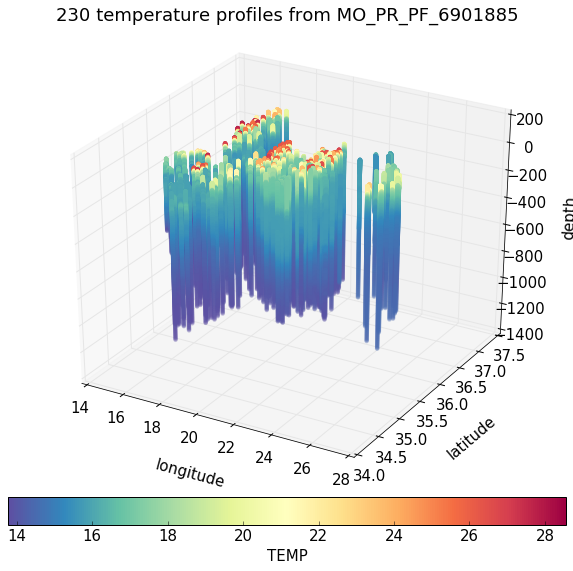

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for a in range(0, len(ds['TIME'])):
    lat = ds['LATITUDE'].values.tolist()[a]
    lon = ds['LONGITUDE'].values.tolist()[a]    
    plt.scatter(lon*np.ones(len(ds['PRES'].values.tolist()[a])),lat*np.ones(len(ds['PRES'].values.tolist()[a])), zs=-ds['PRES'][a,:], zdir='z', s=20, c=good_data[a,:], edgecolor='None', cmap=cmap, norm=norm)
cbar = plt.colorbar(orientation="horizontal", pad=0.02)
cbar.ax.set_xlabel('TEMP')
ax.set_title(str(a+1)+' temperature profiles from '+ ds.id, y=1.08)
ax.set_zlabel('depth',labelpad=20,rotation=90)
ax.set_ylabel('latitude',labelpad=20)
ax.set_xlabel('longitude',labelpad=20)

<h1>PLOTTING AVAILABLE PROFILES IN A CERTAIN TIME RANGE</h1>

In [20]:
subset = ds.sel(TIME=slice('2015-01-01', '2015-12-31'))

In [21]:
subset_good_data = subset['TEMP'].where(ds['TEMP_QC'] == 1)

In [22]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=subset_good_data.min().values.tolist(), vmax=subset_good_data.max().values.tolist())

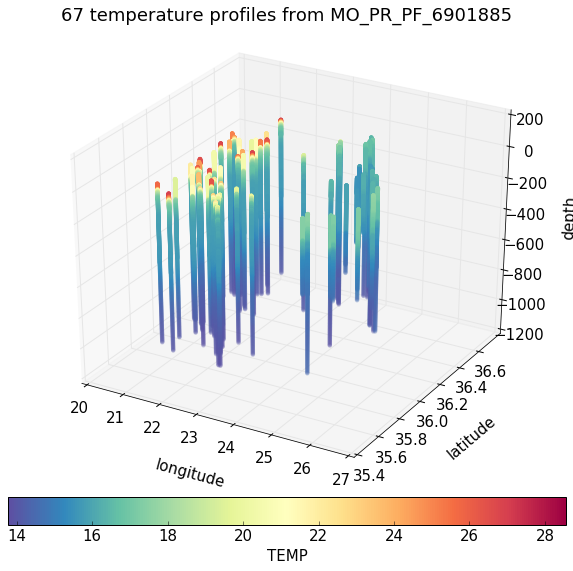

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for a in range(0, len(subset['TIME'])):
    lat = subset['LATITUDE'].values.tolist()[a]
    lon = subset['LONGITUDE'].values.tolist()[a]    
    plt.scatter(lon*np.ones(len(subset['PRES'].values.tolist()[a])),lat*np.ones(len(subset['PRES'].values.tolist()[a])), zs=-subset['PRES'][a,:], zdir='z', s=20, c=subset_good_data[a,:], edgecolor='None', cmap=cmap, norm=norm)
cbar = plt.colorbar(orientation="horizontal", pad=0.02)
cbar.ax.set_xlabel('TEMP')
ax.set_title(str(a+1)+' temperature profiles from '+ ds.id, y=1.08)
ax.set_zlabel('depth',labelpad=20,rotation=90)
ax.set_ylabel('latitude',labelpad=20)
ax.set_xlabel('longitude',labelpad=20)

<h1>PLOTTING AVAILABLE PROFILES IN A CERTAIN AREA</h1>

In [24]:
targeted_lon_min = 24
targeted_lon_max = 26
targeted_lat_min = 35
targeted_lat_max = 38
targeted_area = box(targeted_lon_min, targeted_lat_min, targeted_lon_max, targeted_lat_max)

In [25]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=good_data.min().values.tolist(), vmax=good_data.max().values.tolist())

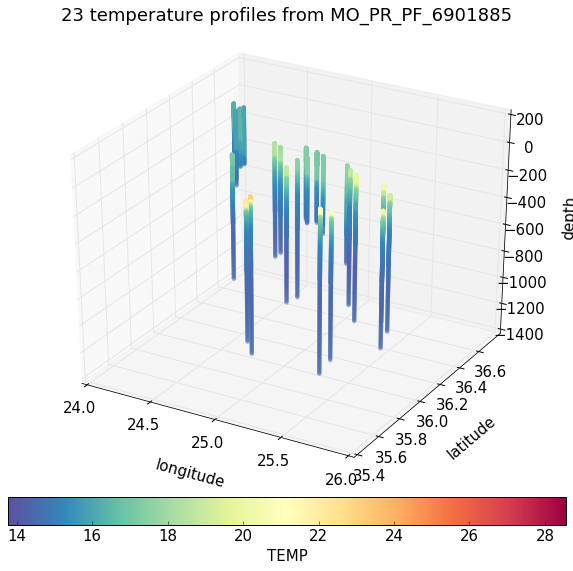

In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
b=0
for a in range(0, len(ds['TIME'])):
    lat = ds['LATITUDE'].values.tolist()[a]
    lon = ds['LONGITUDE'].values.tolist()[a]
    xy_point = Point(lon,lat) # = Point(x,y)
    if targeted_area.contains(xy_point):
        b = b+1
        plt.scatter(lon*np.ones(len(ds['PRES'].values.tolist()[a])),lat*np.ones(len(ds['PRES'].values.tolist()[a])), zs=-ds['PRES'][a,:], zdir='z', s=20, c=good_data[a,:], edgecolor='None', cmap=cmap, norm=norm)
cbar = plt.colorbar(orientation="horizontal", pad=0.02)
cbar.ax.set_xlabel('TEMP')
ax.set_title(str(b)+' temperature profiles from '+ ds.id, y=1.08)
ax.set_zlabel('depth',labelpad=20,rotation=90)
ax.set_ylabel('latitude',labelpad=20)
ax.set_xlabel('longitude',labelpad=20)